In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
files = []
for r, d, f in os.walk('./Data'):
   for item in f:
    files.append(os.path.join(r, item))

In [3]:
full_data = pd.DataFrame()

In [4]:
for file in files:
    df = pd.read_csv(file)
    
    s = str(file[7:29])
    df['Mode'] = int(s[21])
    final_time = []
    for i in df.index:
        t = str(df['timestamp'][i])
        t_list = t.split('.')
        month = s[0:2]
        date = s[3:5]
        hour = s[6:8]
        minute = s[8:10]
        second = str(int(s[10:12]) + int(t_list[0]))
        if int(second) > 59:
            minute = str(int(minute) + 1)
            second = '0'
        if int(minute) > 59:
            hour = str(int(hour) + 1)
            minute = '0'
        millisecond = t_list[1][:3]
        time = "2000/" + month + "/" + date + " " + hour + ":" + minute + ":" + second + "." + millisecond
        # time = datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f")
        # print(time)
        final_time.append(time)
    df.insert(0, 'Time', final_time)
    full_data = full_data.append(df, ignore_index = True)

In [6]:
full_data.rename(columns={"timestamp":"Time Elapsed",
                         "pCut::Motor_Torque":"CutMotorTorque",
                         "pCut::CTRL_Position_controller::Lag_error": "CutLagerror",
                         "pCut::CTRL_Position_controller::Actual_position" :"CutActualPosition",
                         "pCut::CTRL_Position_controller::Actual_speed":"CutActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Actual_position":"FilmActualPosition",
                         "pSvolFilm::CTRL_Position_controller::Actual_speed":"FilmActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Lag_error":"FilmLagError",
                         "pSpintor::VAX_speed":"VAXSpeed"},
                inplace=True)

In [7]:
full_data.head()

,Time,Time Elapsed,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode
0,2000/01/04 18:41:48.008,0.008,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,2000/01/04 18:41:48.011,0.012,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,2000/01/04 18:41:48.015,0.016,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,2000/01/04 18:41:48.019,0.020,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,2000/01/04 18:41:48.023,0.024,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1


# PyOD Models
<p>  <a>https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1</a>
    <ul>Angle-Based Outlier Detection (ABOD) - <a>https://machinelearningstories.blogspot.com/2018/08/anomaly-detection-in-high-dimensional.html</a></ul>
    <ul>k-Nearest Neighbors Detector</ul>
    <ul>Isolation Forest</ul>
    <ul>Histogram-based Outlier Detection - <a>https://mathworld.wolfram.com/Outlier.html</a></ul>
    <ul>Local Correlation Integral (LOCI) - <a>https://loneharoon.wordpress.com/2016/05/26/local-correlation-integral-loci-outlier-detection-algorithm</a>/</ul>
    <ul>Feature Bagging - <a>https://dl.acm.org/doi/10.1145/1081870.1081891</a></ul>
    <ul>Clustering Based Local Outlier Factor -  <a>https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html</a></ul>
</p>

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [9]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

from scipy import stats
%matplotlib inline
import matplotlib.font_manager

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
# Scaling the data
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(full_data.iloc[:,2:10])
scaled_data = pd.DataFrame(scaled_data, columns = full_data.columns[2:10])

In [11]:
scaled_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed
0,0.648919,0.489970,0.675159,0.312375,0.003512,0.136802,0.404687,0.383333
1,0.656793,0.483597,0.675159,0.311749,0.003512,0.137502,0.399005,0.383333
2,0.663291,0.478331,0.675159,0.311248,0.003512,0.138761,0.400284,0.383333
3,0.672423,0.468971,0.675159,0.308742,0.003512,0.140159,0.390846,0.383333
4,0.675925,0.472017,0.675159,0.308617,0.003512,0.141139,0.405982,0.383333
...,...,...,...,...,...,...,...,...
1062907,0.603101,0.476831,0.565444,0.609344,0.007912,0.257379,0.417760,0.416667
1062908,0.602390,0.477294,0.565444,0.610721,0.007912,0.257798,0.420813,0.416667
1062909,0.614861,0.474155,0.565444,0.614855,0.007912,0.255840,0.423025,0.416667
1062910,0.594103,0.491037,0.565444,0.614479,0.007912,0.257658,0.424281,0.416667


In [12]:
model_data = scaled_data[:10000]

In [13]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [14]:
X1 = model_data['CutMotorTorque'].values.reshape(-1,1)
X2 = model_data['CutLagerror'].values.reshape(-1,1)
'''X3 = model_data['CutActualPosition'].values.reshape(-1,1)
X4 = model_data['CutActualSpeed'].values.reshape(-1,1)
X5 = model_data['FilmActualPosition'].values.reshape(-1,1)
X6 = model_data['FilmActualSpeed'].values.reshape(-1,1)
X7 = model_data['FilmLagError'].values.reshape(-1,1)
X8 = model_data['VAXSpeed'].values.reshape(-1,1)'''

X = np.concatenate((X1,X2),axis=1)

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Angle-based Outlier Detector (ABOD) OUTLIERS: 980  INLIERS: 9020


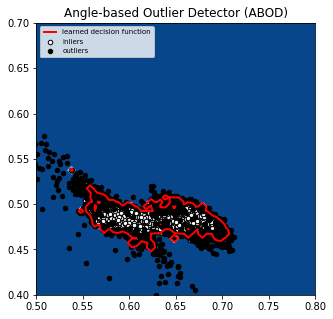

c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Cluster-based Local Outlier Factor (CBLOF) OUTLIERS: 1000  INLIERS: 9000


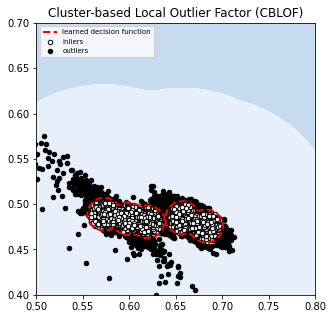

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Feature Bagging OUTLIERS: 909  INLIERS: 9091


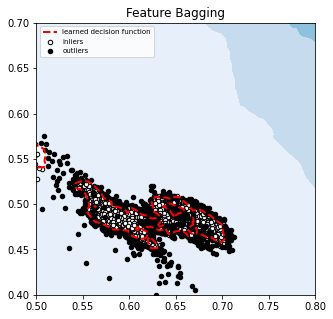

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Histogram-base Outlier Detection (HBOS) OUTLIERS: 716  INLIERS: 9284


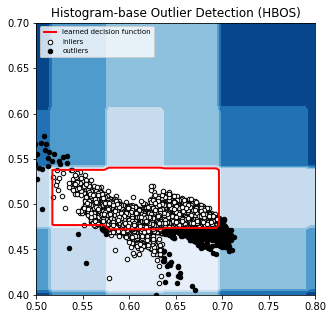

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Isolation Forest OUTLIERS: 1000  INLIERS: 9000


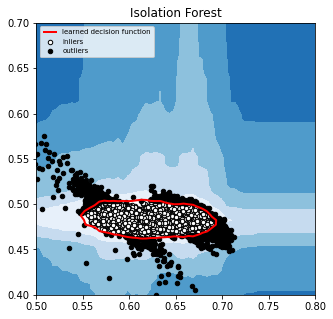

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


K Nearest Neighbors (KNN) OUTLIERS: 825  INLIERS: 9175


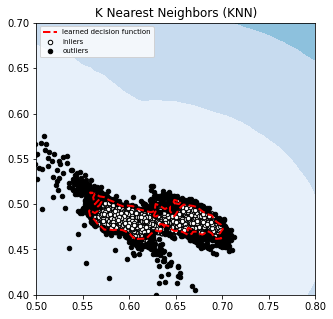

<ipython-input-15-1d32298310eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['outlier'] = y_pred.tolist()


Average KNN OUTLIERS: 622  INLIERS: 9378


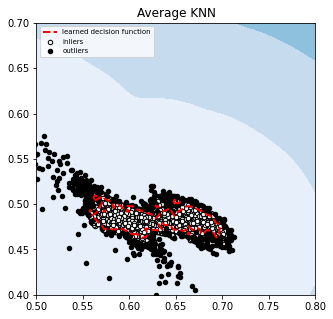

In [15]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(5, 5))
    
    # copy of dataframe
    dfx = model_data
    dfx['outlier'] = y_pred.tolist()
    
    # IX - inlier feature
    IX1 =  np.array(dfx['CutMotorTorque'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['CutLagerror'][dfx['outlier'] == 0]).reshape(-1,1)
    '''IX3 = np.array(dfx['CutActualPosition'][dfx['outlier'] == 0]).reshape(-1,1)
    IX4 = np.array(dfx['CutActualSpeed'][dfx['outlier'] == 0]).reshape(-1,1)
    IX5 = np.array(dfx['FilmActualPosition'][dfx['outlier'] == 0]).reshape(-1,1)
    IX6 = np.array(dfx['FilmActualSpeed'][dfx['outlier'] == 0]).reshape(-1,1)
    IX7 = np.array(dfx['FilmLagError'][dfx['outlier'] == 0]).reshape(-1,1)
    IX8 = np.array(dfx['VAXSpeed'][dfx['outlier'] == 0]).reshape(-1,1)'''
    
    # OX - outlier feature 
    OX1 =  dfx['CutMotorTorque'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['CutLagerror'][dfx['outlier'] == 1].values.reshape(-1,1)
    '''OX3 = np.array(dfx['CutActualPosition'][dfx['outlier'] == 0]).reshape(-1,1)
    OX4 = np.array(dfx['CutActualSpeed'][dfx['outlier'] == 0]).reshape(-1,1)
    OX5 = np.array(dfx['FilmActualPosition'][dfx['outlier'] == 0]).reshape(-1,1)
    OX6 = np.array(dfx['FilmActualSpeed'][dfx['outlier'] == 0]).reshape(-1,1)
    OX7 = np.array(dfx['FilmLagError'][dfx['outlier'] == 0]).reshape(-1,1)
    OX8 = np.array(dfx['VAXSpeed'][dfx['outlier'] == 0]).reshape(-1,1)'''
         
    print(clf_name, 'OUTLIERS:',n_outliers,' INLIERS:',n_inliers)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')   
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=7),
        loc=2)
      
    plt.xlim((0.5, 0.8))
    plt.ylim((0.4, 0.7))
    plt.title(clf_name)
    plt.show()


In [17]:
pca = PCA(n_components = 2) 
cols = ['CutMotorTorque', 'CutLagerror', 'CutActualPosition', 'CutActualSpeed', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed'] 
data_pca = pca.fit_transform(model_data[cols])

In [18]:
data_pca = pd.DataFrame(data_pca)

In [19]:
data_pca.columns = ['Feature1', 'Feature2']

In [20]:
data_pca.head()

,Feature1,Feature2
0,-0.080200,0.038328
1,-0.082544,0.040179
2,-0.084967,0.039665
3,-0.089225,0.042050
4,-0.091477,0.037962


In [22]:
X1 = data_pca['Feature1'].values.reshape(-1,1)
X2 = data_pca['Feature2'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

Angle-based Outlier Detector (ABOD) OUTLIERS: 986  INLIERS: 9014


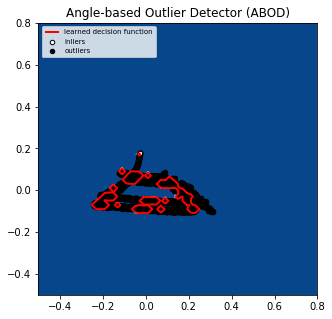

c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Cluster-based Local Outlier Factor (CBLOF) OUTLIERS: 1000  INLIERS: 9000


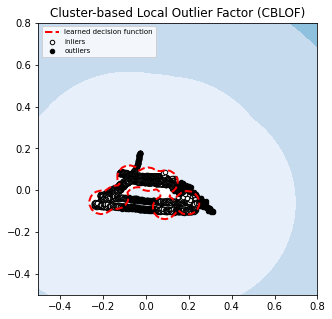

Feature Bagging OUTLIERS: 928  INLIERS: 9072


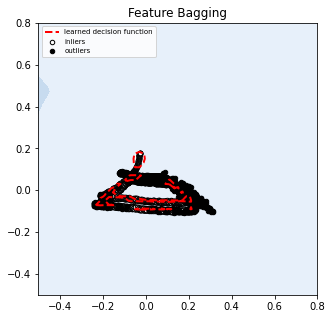

Histogram-base Outlier Detection (HBOS) OUTLIERS: 938  INLIERS: 9062


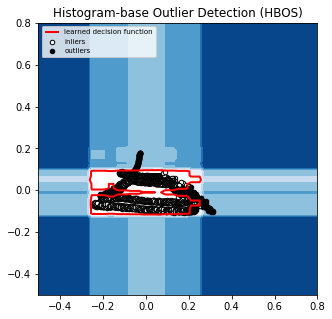

Isolation Forest OUTLIERS: 1000  INLIERS: 9000


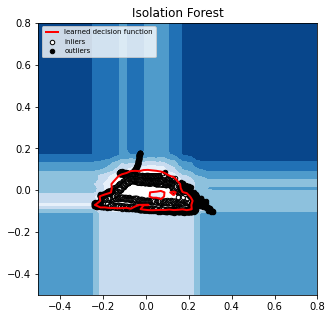

K Nearest Neighbors (KNN) OUTLIERS: 724  INLIERS: 9276


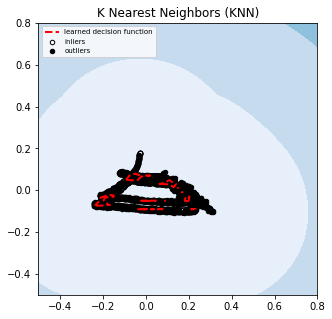

Average KNN OUTLIERS: 379  INLIERS: 9621


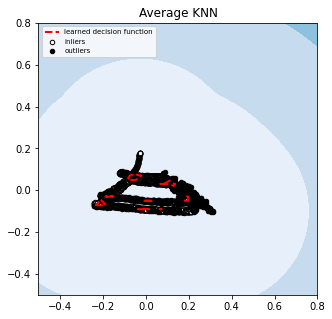

In [27]:
xx , yy = np.meshgrid(np.linspace(-2,2 , 200), np.linspace(-2, 2, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(5, 5))
    
    # copy of dataframe
    dfx = data_pca
    dfx['outlier'] = y_pred.tolist()
    
    # IX - inlier feature
    IX1 =  np.array(dfx['Feature1'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Feature2'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX - outlier feature 
    OX1 =  dfx['Feature1'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Feature2'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print(clf_name, 'OUTLIERS:',n_outliers,' INLIERS:',n_inliers)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')   
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=7),
        loc=2)
      
    plt.xlim((-0.5, 0.8))
    plt.ylim((-0.5, 0.8))
    plt.title(clf_name)
    plt.show()
